In [1]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
seabron

NameError: name 'seabron' is not defined

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, classification_report, accuracy_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:

data = pd.read_csv('M1_final.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

unique_number = data['Condition'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_number)}

data['Condition_num'] = data['Condition'].map(label_mapping)
data.insert(19,'Condition_num', data.pop('Condition_num'))

data['wind_num'] = data['Wind'].map({label: idx + 1 for idx, label in enumerate(data['Wind'].unique())})
data.insert(16,'wind_num', data.pop('wind_num'))

Text(0.5, 1.0, 'Correlation of JKF data Feature ')

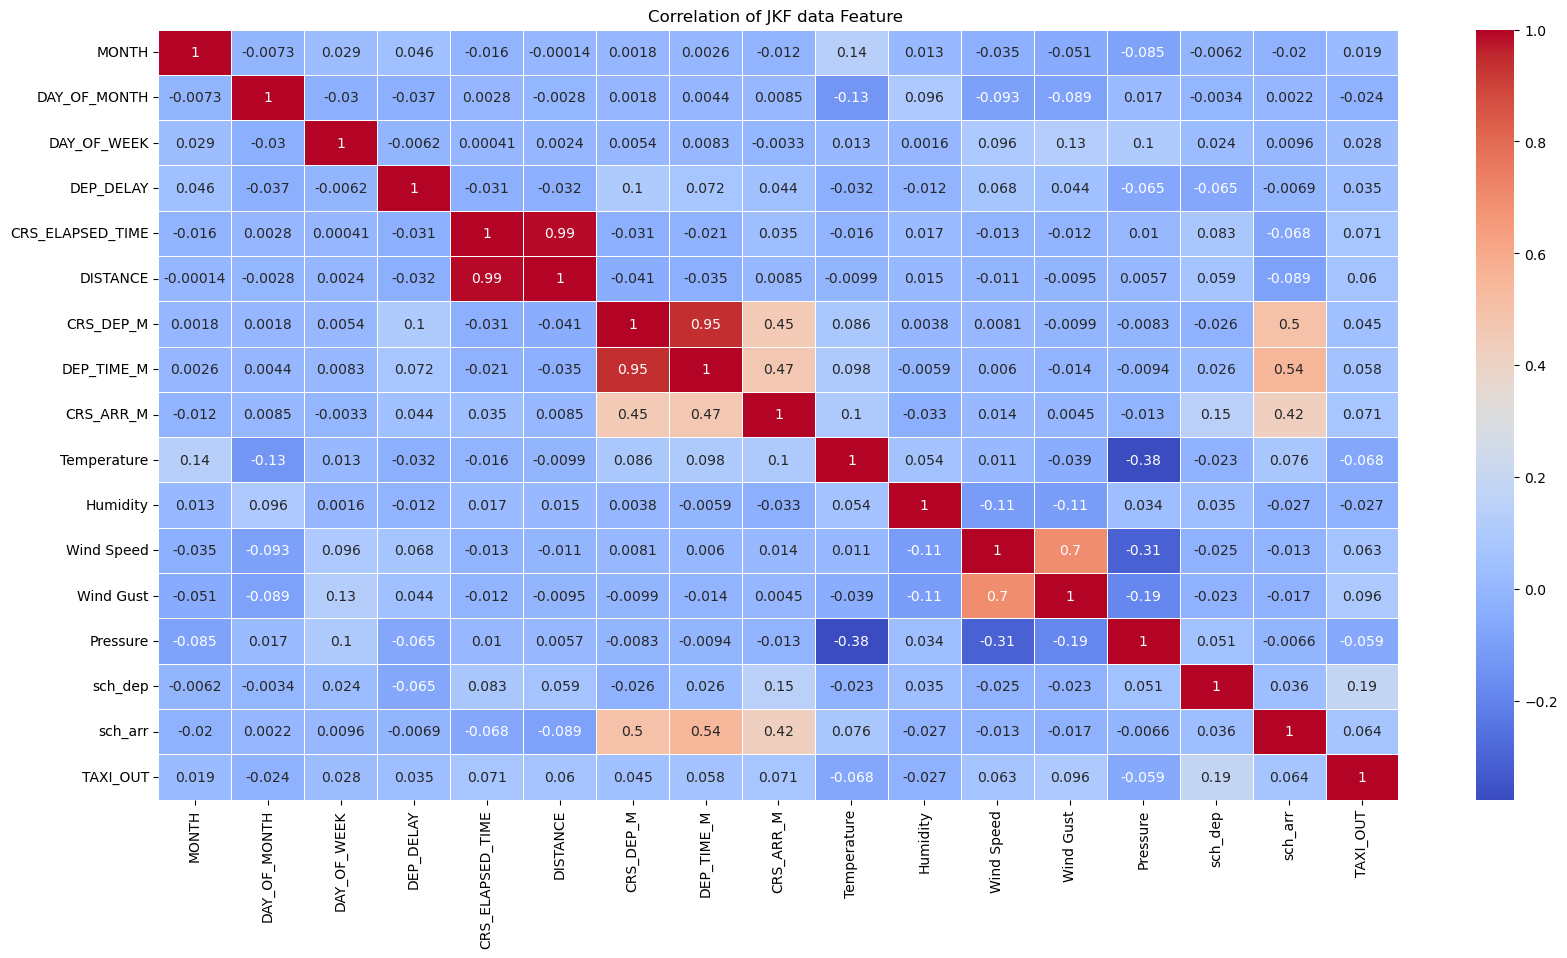

In [ ]:
## Here we can find some correlation between data features 

corr_jfk = data.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(20,10), )
sns.heatmap(corr_jfk, cmap="coolwarm", linewidths=0.5, ax=ax, annot= True)
plt.title('Correlation of JKF data Feature ')


## Here we can see some feature is highly correlated with TAXI_out time 

# Load dataset
X = data[['DEP_DELAY']]
y = data['TAXI_OUT']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("Linear Regression MSE for DEP_DELAY:", mse)


# Here X = independent variable and Y = dependent variable , Our dependent variable is TAXI_OUT
# and for X we consider data from corelation with 'DISTANCE', CRS_DEP_M', Wind_Seed', Humidity and sch_dep
def data_preparation(x,y):
    # split data to for train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    # here we scale data that to train our model
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

## Here in this function we count liner regression, gradient_descent, Lasso and Rigid 
def regression_model(x_train, x_test, y_train, y_test):
    ## Train linier regression model 
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    # Make predictions and evaluate
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Linear Regression MSE for DEP_DELAY:", mse)

    # Visualize results
    plot_results(y_test, y_pred, 'Linear Regression')


    ## Train 


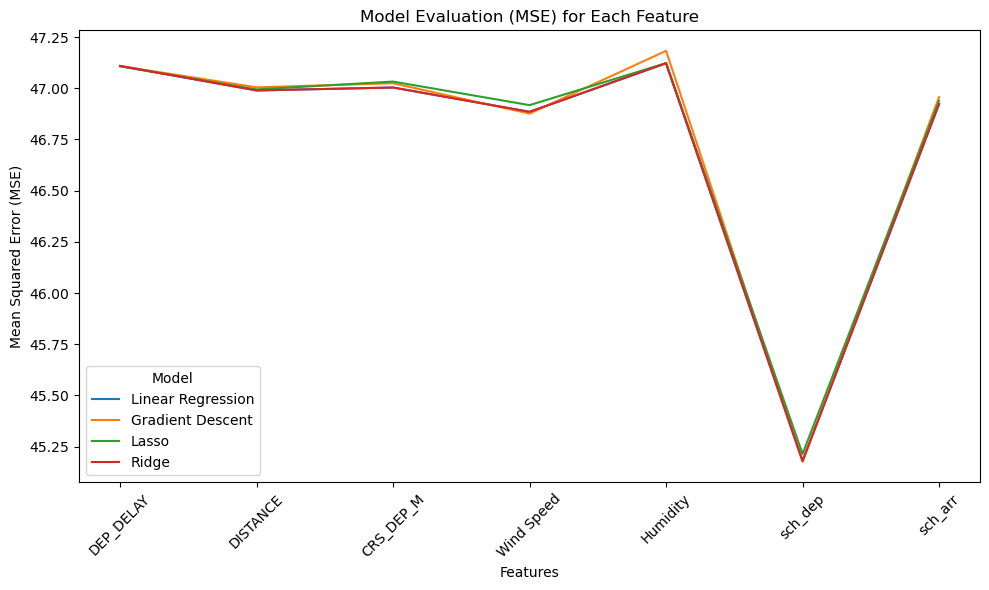

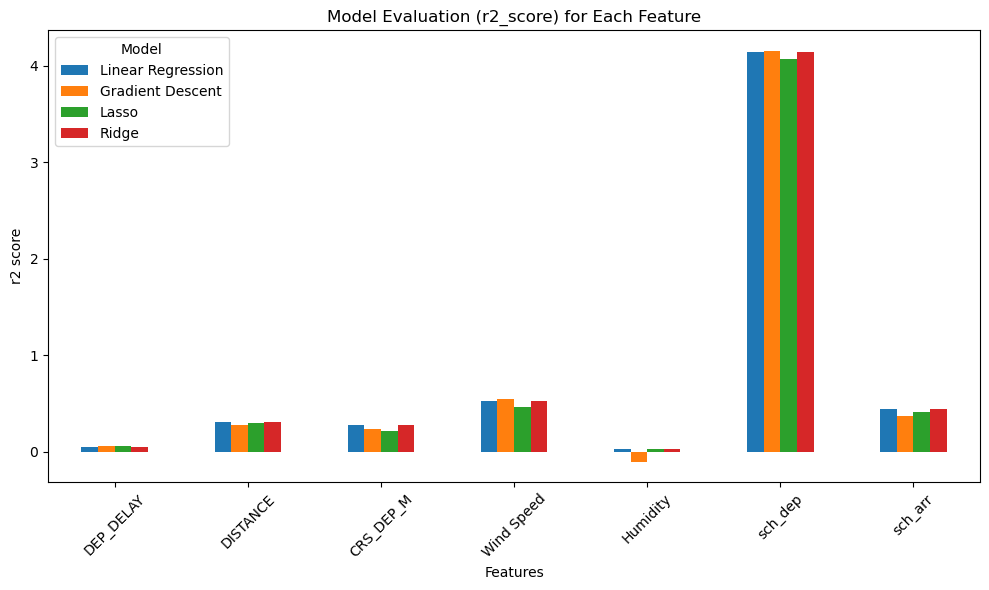

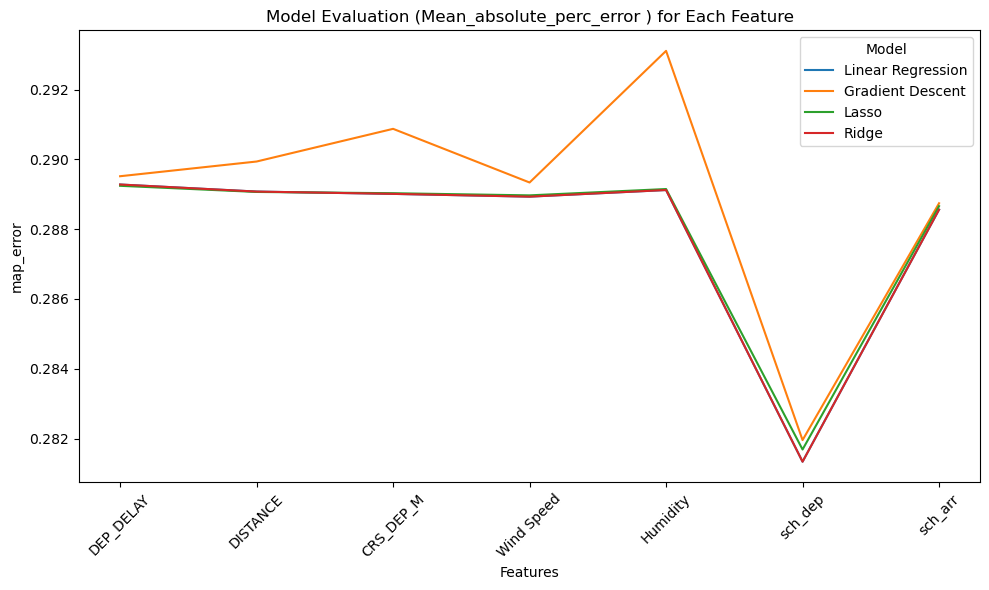

In [44]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
# Load dataset

# Define features and the target
features = ['DEP_DELAY', 'DISTANCE', 'CRS_DEP_M', 'Wind Speed', 'Humidity', 'sch_dep', 'sch_arr']
target = 'TAXI_OUT'

# Prepare dictionary to store values for each feature and model
mse_results = {feature: {} for feature in features}
r2_results = {feature: {} for feature in features} 
mapr_results = {feature: {} for feature in features}

# Define models to use
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Descent': SGDRegressor(max_iter=1000, tol=1e-3),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
}

# Iterate over each feature and train each model
for feature in features:
    X = data[[feature]]
    y = data[target]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test,y_pred)
        absolute_per_error = mean_absolute_percentage_error(y_test, y_pred)
    
        # Store MSE result
        mse_results[feature][model_name] = mse
        r2_results[feature][model_name] = r2
        mapr_results[feature][model_name] = absolute_per_error

# Convert MSE results to a DataFrame for visualization
mse_df = pd.DataFrame(mse_results).T
r2_score_df = pd.DataFrame(r2_results).T * 100
mapr_df = pd.DataFrame(mapr_results).T
# Plot MSE for each feature and model
mse_df.plot(kind='line', figsize=(10, 6))
plt.title("Model Evaluation (MSE) for Each Feature")
plt.xlabel("Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot r2 for each feature and model
r2_score_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Evaluation (r2_score) for Each Feature")
plt.xlabel("Features")
plt.ylabel("r2 score")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mapr_df.plot(kind='line', figsize=(10, 6))
plt.title("Model Evaluation (Mean_absolute_perc_error ) for Each Feature")
plt.xlabel("Features")
plt.ylabel("map_error")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Here we explore some other model established independent variable to out dependent variable 'TAXI_OUT'. 
## Try we randomForest first
feature = ['DEP_DELAY', 'DISTANCE', 'CRS_DEP_M', 'Wind Speed', 'Humidity', 'sch_dep', 'sch_arr']
x = data[feature]
y = data['TAXI_OUT']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)



rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(x_test)

# model evolution metrics 
r2 = r2_score(y_test, y_pred)
print(f'r2 scoor for modele : {r2}') 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean square error : {mse}') 
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root mean square error : {rmse}')
#accuracy_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score : {accuracy_score}')



r2 scoor for modele : -0.4280700551592882
Mean square error : 66.41325468424705
Root mean square error : 8.14943278297619
Accuracy score : 0.07286606523247745
